Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


Export to ONNX models

In [2]:
!python export.py --weights yolov5n-seg.pt --include onnx --opset 12
!python export.py --weights yolov5s-seg.pt --include onnx --opset 12
!python export.py --weights yolov5m-seg.pt --include onnx --opset 12

export: data=data/coco128.yaml, weights=['yolov5n-seg.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

100% 4.11M/4.11M [00:00<00:00, 19.3MB/s]

Fusing layers... 
YOLOv5n-seg summary: 224 layers, 1986637 parameters, 0 gradients, 7.1 GFLOPs

PyTorch: starting from yolov5n-seg.pt with output shape (1, 25200, 117) (4.1 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
t

Test models

segment/predict: weights=['yolov5n-seg.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading yolov5n-seg.onnx for ONNX Runtime inference...
image 1/2 /content/yolov5/data/images/bus.jpg: 640x640 3 persons, 1 bus, 20.4ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 640x640 2 persons, 1 tie, 19.6ms
Speed: 0.6ms pre-process, 20.0ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/exp


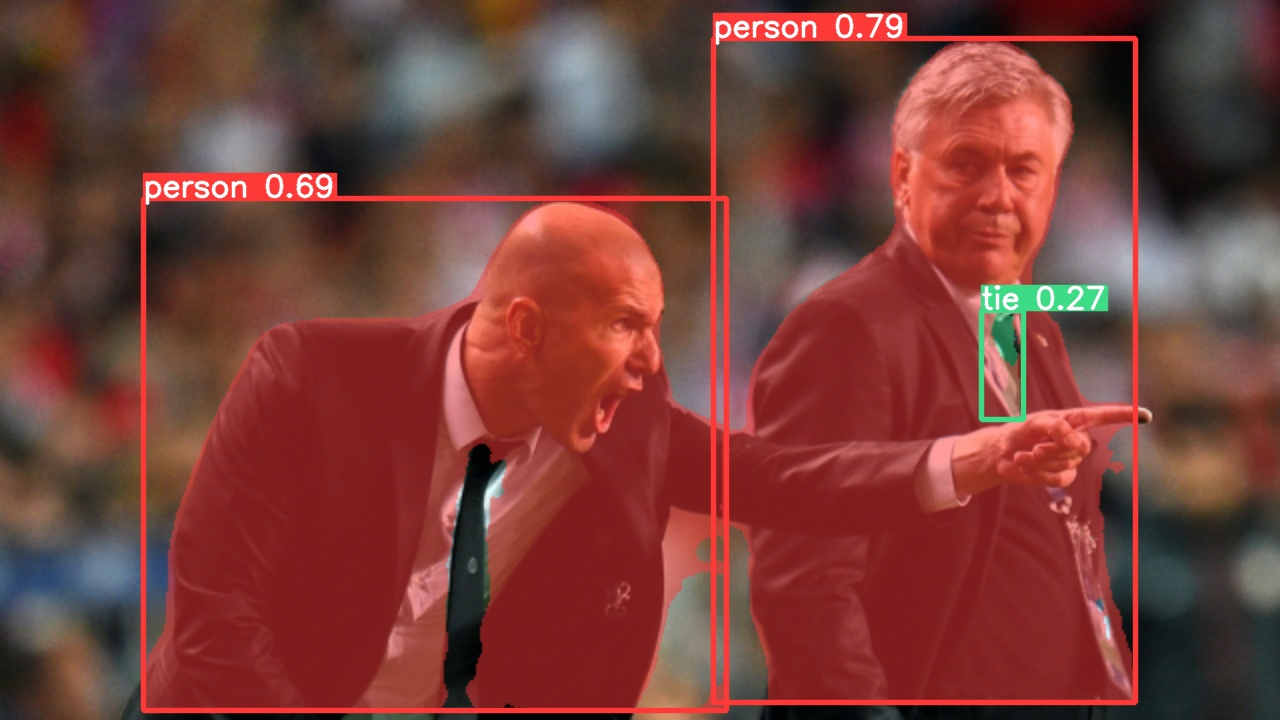

In [6]:
!python segment/predict.py --weights yolov5n-seg.onnx --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/predict-seg/exp/zidane.jpg', width=600)